In [1]:
import os
import sys
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
tf.__version__

'1.12.0'

# Classifying movie reviews: a binary classification example
----

Two-class classification, or binary classification, may be the most widely applied kind of machine learning problem. In this example, we 
will learn to classify movie reviews into "positive" reviews and "negative" reviews, just based on the text content of the reviews.

## The IMDB dataset

We'll be working with "IMDB dataset", a set of 50,000 highly-polarized reviews from the Internet Movie Database. They are split into 25,000 
reviews for training and 25,000 reviews for testing, each set consisting in 50% negative and 50% positive reviews.

In [2]:
from tensorflow.keras.datasets import imdb

(train_data, train_labels), (test_data, test_labels) = imdb.load_data(num_words=10000) # consider only most frequent 10k words

In [3]:
max([max(sequence) for sequence in train_data])

9999

In [4]:
train_data.shape, train_labels.shape

((25000,), (25000,))

In [5]:
test_data.shape, test_labels.shape

((25000,), (25000,))

### For kicks, here's how you can quickly decode one of these reviews back to English words:

In [6]:
# word_index is a dictionary mapping words to an integer index
word_index = imdb.get_word_index()

# reverse word-index mapping
reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])

# decode the review; note that our indices were offset by 3
# because 0, 1 and 2 are reserved indices for "padding", "start of sequence", and "unknown".
decoded_review = " ".join([reverse_word_index.get(i - 3, '?') for i in train_data[0]])

In [7]:
"sample english review = ", decoded_review

('sample english review = ',
 "? this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert ? is an amazing actor and now the same being director ? father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for ? and would recommend it to everyone to watch and the fly fishing was amazing really cried at the end it was so sad and you know what they say if you cry at a film it must have been good and this definitely was also ? to the two little boy's that played the ? of norman and paul they were just brilliant children are often left out of the ? list i think because the stars that play them all grown up are such a big profile for the whole film but these children are amazing and should be praised for wh

## Preparing data

In [8]:
# vectorize input feature
def vectorize_sequences(sequences, dimension=10000):
    # create an all-zero matrix of shape (len(sequences), dimension)
    results = np.zeros((len(sequences), dimension))
    for i, sequence in enumerate(sequences):
        results[i, sequence] = 1.  # set specific indices of results[i] to 1s
    return results

# vectorized training data
x_train = vectorize_sequences(train_data)

# vectorized test data
x_test = vectorize_sequences(test_data)

In [9]:
x_train[0], x_test[0]

(array([0., 1., 1., ..., 0., 0., 0.]), array([0., 1., 1., ..., 0., 0., 0.]))

In [10]:
# vectorized labels
y_train = np.asarray(train_labels).astype("float32")
y_test = np.asarray(test_labels).astype("float32")

## Building Model

In [11]:
from tensorflow.keras import models, layers

In [12]:
# initiate model
model = models.Sequential()

# input layer
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))

# hidden layer
model.add(layers.Dense(16, activation="relu"))

# output layer
model.add(layers.Dense(1, activation="sigmoid"))

In [13]:
# compile model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

In [14]:
# # another way
# model.compile(optimizer=optimizers.RMSprop(lr=0.001),
#               loss=losses.binary_crossentropy,
#               metrics=[metrics.binary_accuracy])

## Validating our approach

In [15]:
# split train data into train and validate set
x_val = x_train[:10000]
partial_x_train = x_train[10000:]

y_val = y_train[:10000]
partial_y_train = y_train[10000:]

In [16]:
# train model for 20 epochs in batches of 512 and validate on validation set
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/20
15000/15000 [==============================] - 3s 201us/step - loss: 0.5259 - acc: 0.7884 - val_loss: 0.4035 - val_acc: 0.8638
Epoch 2/20
15000/15000 [==============================] - 2s 109us/step - loss: 0.3200 - acc: 0.8996 - val_loss: 0.3120 - val_acc: 0.8870
Epoch 3/20
15000/15000 [==============================] - 2s 107us/step - loss: 0.2331 - acc: 0.9247 - val_loss: 0.2802 - val_acc: 0.8916
Epoch 4/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1834 - acc: 0.9405 - val_loss: 0.2723 - val_acc: 0.8921
Epoch 5/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1481 - acc: 0.9523 - val_loss: 0.2751 - val_acc: 0.8892
Epoch 6/20
15000/15000 [==============================] - 2s 104us/step - loss: 0.1251 - acc: 0.9597 - val_loss: 0.2925 - val_acc: 0.8862
Epoch 7/20
15000/15000 [==============================] - 2s 106us/step - loss: 0.1027 - acc: 0.9694 - val_loss: 0.3037 - 

In [17]:
# check whats stored in history object
history_dict = history.history
history_dict.keys()

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])

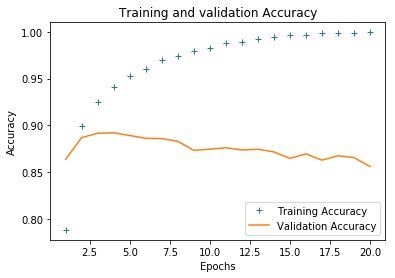

In [18]:
# plot training accuracy 
acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "+", label="Training Accuracy")

plt.plot(epochs, val_acc, "-", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

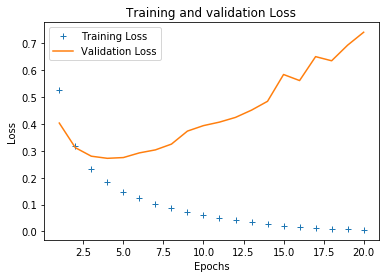

In [19]:
# plot training accuracy 
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "+", label="Training Loss")

plt.plot(epochs, val_loss, "-", label="Validation Loss")
plt.title("Training and validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

As you can see, the training loss decreases with every epoch and the training accuracy increases with every epoch. This is "overfitting": after the second epoch, we are over-optimizing on the training data, and we ended up learning representations that are specific to the training data and do not generalize to data outside of the training set.

In [20]:
# initiate model
model = models.Sequential()

# input layer
model.add(layers.Dense(16, activation="relu", input_shape=(10000,)))

# hidden layer
model.add(layers.Dense(16, activation="relu"))

# output layer
model.add(layers.Dense(1, activation="sigmoid"))

# compile the model
model.compile(optimizer="rmsprop",
              loss="binary_crossentropy",
              metrics=["accuracy"])

# train model for 20 epochs in batches of 512 and validate on validation set
history = model.fit(partial_x_train,
                    partial_y_train,
                    epochs=4,
                    batch_size=512,
                    validation_data=(x_val, y_val))

Train on 15000 samples, validate on 10000 samples
Epoch 1/4
15000/15000 [==============================] - 3s 178us/step - loss: 0.5345 - acc: 0.7799 - val_loss: 0.4056 - val_acc: 0.8642
Epoch 2/4
15000/15000 [==============================] - 2s 119us/step - loss: 0.3157 - acc: 0.9018 - val_loss: 0.3318 - val_acc: 0.8674
Epoch 3/4
15000/15000 [==============================] - 2s 108us/step - loss: 0.2308 - acc: 0.9243 - val_loss: 0.2797 - val_acc: 0.8916
Epoch 4/4
15000/15000 [==============================] - 2s 106us/step - loss: 0.1800 - acc: 0.9415 - val_loss: 0.2817 - val_acc: 0.8857


## Visualize model performance

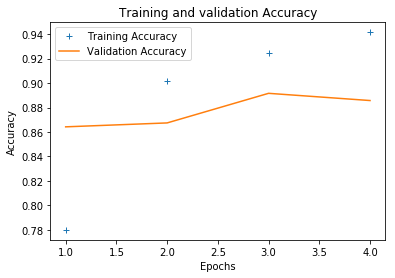

In [21]:
# plot training accuracy 
acc = history.history["acc"]
val_acc = history.history["val_acc"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, acc, "+", label="Training Accuracy")

plt.plot(epochs, val_acc, "-", label="Validation Accuracy")
plt.title("Training and validation Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()

plt.show()

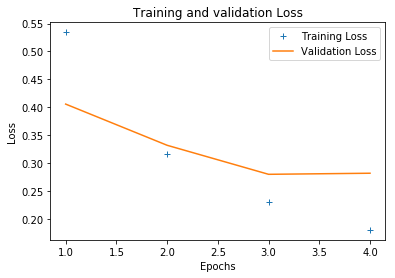

In [22]:
# plot training accuracy 
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

plt.plot(epochs, loss, "+", label="Training Loss")

plt.plot(epochs, val_loss, "-", label="Validation Loss")
plt.title("Training and validation Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.show()

## Generating Predictions on New Data

In [23]:
model.predict(x_test)

array([[0.33123836],
       [0.9997135 ],
       [0.9516517 ],
       ...,
       [0.12547272],
       [0.23359798],
       [0.59006196]], dtype=float32)

In [24]:
# evaluate on test set
results = model.evaluate(x_test, y_test)

25000/25000 [==============================] - 2s 67us/step


In [25]:
"loss = {}, accuracy = {}".format(results[0], results[1])

'loss = 0.2958216102409363, accuracy = 0.88068'

Our fairly naive approach achieves an accuracy of 88%. With state-of-the-art approaches, one should be able to get close to 95%.